In [1]:
%matplotlib inline
%load_ext rmagic
print __doc__
import numpy as np
import pyart
import matplotlib.pyplot as plt
import netCDF4
import copy
import scipy.ndimage as nd
import numpy.ma as ma
from IPython.display import Latex

Automatically created module for IPython interactive environment


/home/sofia/anaconda/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [6]:
file1='/home/sofia/radar_parana/DATOS/CFRad/20100304/120/cfrad.20100304_083346.000_to_20100304_083734.000_INTA_Par_v44_SUR.nc' 
file2='/home/sofia/radar_parana/DATOS/CFRad/20100304/120/cfrad.20100304_120346.000_to_20100304_120735.000_INTA_Par_v62_SUR.nc' 
file3='/home/sofia/radar_parana/DATOS/CFRad/20100304/120/cfrad.20100304_164347.000_to_20100304_164736.000_INTA_Par_v89_SUR.nc'
file4='/home/sofia/radar_parana/DATOS/CFRad/20100304/120/cfrad.20100304_195345.000_to_20100304_195730.778_INTA_Par_v108_SUR.nc'
file5='/home/sofia/radar_parana/DATOS/CFRad/20100304/120/cfrad.20100304_144346.000_to_20100304_144734.000_INTA_Par_v77_SUR.nc'
file6='/home/sofia/radar_parana/DATOS/CFRad/20100304/120/cfrad.20100304_222345.000_to_20100304_222732.973_INTA_Par_v122_SUR.nc'


radar1=pyart.io.read_cfradial(file1)
radar2=pyart.io.read_cfradial(file2)
radar3=pyart.io.read_cfradial(file3)
radar4=pyart.io.read_cfradial(file4)
radar5=pyart.io.read_cfradial(file5)
radar6=pyart.io.read_cfradial(file6)


In [4]:
# set the desired azimuth
# El 0 es el norte y aumenta en sentido horario

###quien es desaz????
desaz=261.0
sweep=0

# get the ray we want from the sweep we want
# esto es una correcion porque el radar empieza a elevarse antes de completar la vuelta y entonces
# con esta cuenta seleccionas el azimuth que coresponde
i1 = radar6.sweep_start_ray_index['data'][sweep]
i2 = radar6.sweep_end_ray_index['data'][sweep]
azimuth=radar6.azimuth['data'][i1:i2]
azdiff=abs(azimuth-desaz)
ray_num = azdiff.argmin()+i1

print ray_num, azimuth[ray_num-i1], i1, i2


55 261.008 0 360


In [133]:
###desvio estandar de PhiDP Ptrimera version
radar21=radar2.extract_sweeps([0,1,2])
r=radar2.extract_sweeps([1])
datos=radar21.fields['PhiDP']['data'].copy()
pego=r.fields['PhiDP'].copy()
sweep1=datos[0:360,]
sweep2=datos[361:722,]
sweep3=datos[723:,]

####Ver como elegir los datos TRUE!!!!!!

grupo=np.array([sweep2[1,0],sweep2[1,1],sweep2[1,2],sweep1[1,0],sweep1[1,1],sweep1[1,2],sweep3[1,0],sweep3[1,1],sweep3[1,2]])
grupo.std()

for azi in range(1,360):
    for ran in range(1,479):
            grupo=np.array([sweep2[azi,ran-1],sweep2[azi,ran],sweep2[azi,ran+1],sweep1[azi,ran-1],sweep1[azi,ran],sweep1[azi,ran+1],sweep3[azi,ran-1],sweep3[azi,ran],sweep3[azi,ran+1]])
            pego['data'][azi,ran]=grupo.std() 
            
r.add_field('sPhiDP',pego)

In [4]:
radar21=radar2.extract_sweeps([0,1,2])
r=radar2.extract_sweeps([1])
datos=radar21.fields['PhiDP']['data'].copy()
pego=r.fields['PhiDP'].copy()
for azi in range(0,360):
    for ran in range(1,479):
         pego['data'][azi,ran]=datos[[azi,azi+361,azi+723],ran-1:ran+1].std()
###que pasa si saco el ['data'] de pego??

In [5]:
mini=pego['data'].min()
maxi=pego['data'].max()
mini
maxi
r.add_field('sPhiDP',pego)


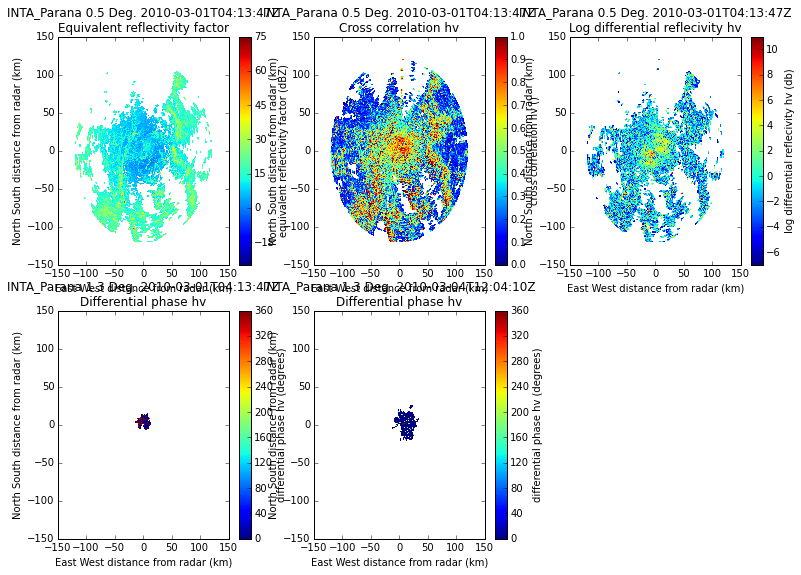

In [10]:
display2 = pyart.graph.RadarMapDisplay(radar2)
display1 = pyart.graph.RadarMapDisplay(r)

f = plt.figure(figsize = [13,9])

plt.subplot(2, 3, 1) 
display2.plot_ppi('dBZ',vmin=-25,vmax=75)
plt.subplot(2, 3, 2) 
display2.plot_ppi('RhoHV',vmin=0,vmax=1)
plt.subplot(2, 3, 3) 
display2.plot_ppi('ZDR',vmin=-7,vmax=11) 
plt.subplot(2, 3, 4) 
display2.plot_ppi('PhiDP',vmin=0,vmax=360,sweep=1) 
plt.subplot(2, 3, 5) 
display1.plot_ppi('sPhiDP',vmin=0,vmax=360) ##???
#plt.subplot(2, 3, 6) 
#display3.plot_ppi('dBZ',vmin=-25,vmax=75)


###Caso de 2 de marzo 2010 (rango 240)

In [2]:
#file1='/home/sofia/radar_parana/DATOS/CFRad/20100302/240/cfrad.20100302_005002.000_to_20100302_005343.000_INTA_Par_v6_SUR.nc' 
#file2='/home/sofia/radar_parana/DATOS/CFRad/20100302/240/cfrad.20100302_074002.000_to_20100302_074342.000_INTA_Par_v46_SUR.nc' 
#file3='/home/sofia/radar_parana/DATOS/CFRad/20100302/240/cfrad.20100302_155002.000_to_20100302_155342.999_INTA_Par_v95_SUR.nc'
#file4='/home/sofia/radar_parana/DATOS/CFRad/20100302/240/cfrad.20100302_130002.000_to_20100302_130343.001_INTA_Par_v78_SUR.nc'
#file5='/home/sofia/radar_parana/DATOS/CFRad/20100302/240/cfrad.20100302_190002.000_to_20100302_190341.999_INTA_Par_v114_SUR.nc'
file6='/home/sofia/radar_parana/DATOS/CFRad/20100302/240/cfrad.20100302_202003.000_to_20100302_202342.000_INTA_Par_v121_SUR.nc'

#radar1=pyart.io.read_cfradial(file1)
#radar2=pyart.io.read_cfradial(file2)
#radar3=pyart.io.read_cfradial(file3)
#radar4=pyart.io.read_cfradial(file4)
#radar5=pyart.io.read_cfradial(file5)
#radar6=pyart.io.read_cfradial(file6)

###trabajo con el caso de 20:20 UTC

In [11]:
#calculo desvio estandar de phi dp solo para la segunda elevacion (ventana de 3*3)

radar=pyart.io.read_cfradial(file6)

radar_3=radar.extract_sweeps([0,1,2])
radar_1=radar.extract_sweeps([1])
datos=radar_3.fields['PhiDP']['data'].copy()
std_phidp=radar_1.fields['PhiDP'].copy()
for azi in range(0,360):
    for ran in range(1,479):
         std_phidp['data'][azi,ran]=datos[[azi,azi+361,azi+723],ran-1:ran+2].std()
            
radar_1.add_field('sdPhiDP',std_phidp)            

TypeError: object of type 'numpy.float64' has no len()

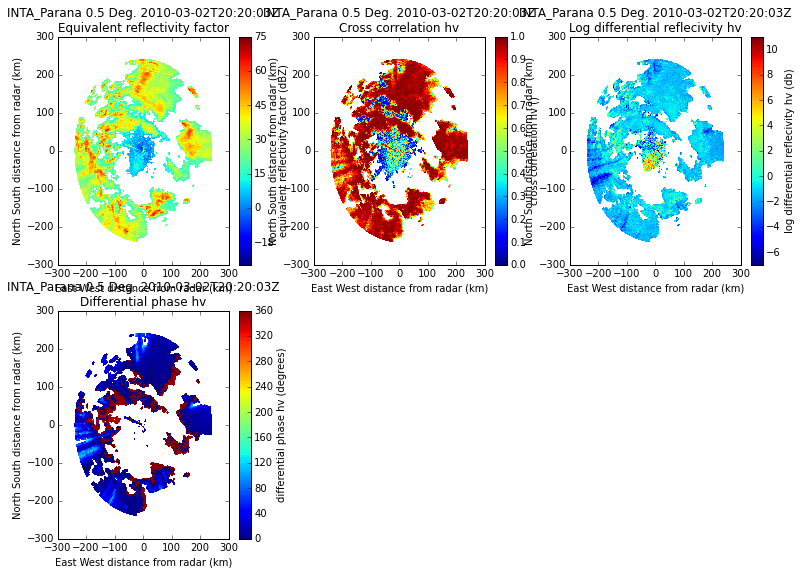

In [4]:
display = pyart.graph.RadarMapDisplay(radar)
display1 = pyart.graph.RadarMapDisplay(radar_1)

f = plt.figure(figsize = [13,9])

plt.subplot(2, 3, 1) 
display.plot_ppi('dBZ',vmin=-25,vmax=75)
plt.subplot(2, 3, 2) 
display.plot_ppi('RhoHV',vmin=0,vmax=1)
plt.subplot(2, 3, 3) 
display.plot_ppi('ZDR',vmin=-7,vmax=11) 
plt.subplot(2, 3, 4) 
display.plot_ppi('PhiDP',vmin=0,vmax=360) 




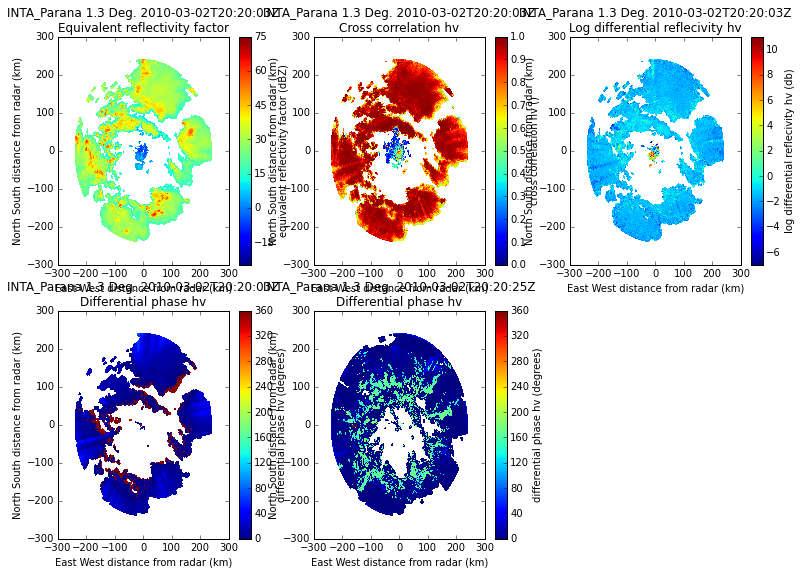

In [6]:

f = plt.figure(figsize = [13,9])

plt.subplot(2, 3, 1) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=1)
plt.subplot(2, 3, 2) 
display.plot_ppi('RhoHV',vmin=0,vmax=1,sweep=1)
plt.subplot(2, 3, 3) 
display.plot_ppi('ZDR',vmin=-7,vmax=11,sweep=1) 
plt.subplot(2, 3, 4) 
display.plot_ppi('PhiDP',vmin=0,vmax=360,sweep=1) 
plt.subplot(2, 3, 5) 
display1.plot_ppi('sdPhiDP',vmin=0,vmax=360) 


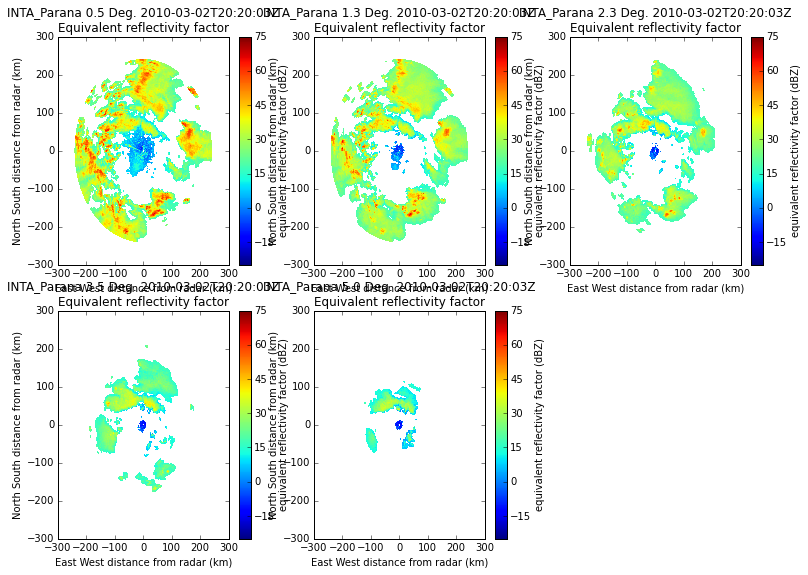

In [8]:
f = plt.figure(figsize = [13,9])

plt.subplot(2, 3, 1) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=0)
plt.subplot(2, 3, 2) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=1)
plt.subplot(2, 3, 3) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=2)
plt.subplot(2, 3, 4) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=3)
plt.subplot(2, 3, 5) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=4)


#Version 2

In [96]:
file6='/home/sofia/radar_parana/DATOS/CFRad/20100304/120/cfrad.20100304_222345.000_to_20100304_222732.973_INTA_Par_v122_SUR.nc'
file5='/home/sofia/radar_parana/DATOS/CFRad/20100302/240/cfrad.20100302_190002.000_to_20100302_190341.999_INTA_Par_v114_SUR.nc'
file4='/home/sofia/radar_parana/DATOS/CFRad/20100302/240/cfrad.20100302_202003.000_to_20100302_202342.000_INTA_Par_v121_SUR.nc'
radar2=radar=pyart.io.read_cfradial(file4)

In [97]:
#len(radar2.altitude['data'])
radar2.altitude['data']=[radar2.altitude['data']] ##Parche!!
ele1=radar2.extract_sweeps([0])


In [98]:
#ele1.fields['stdPhiDP']=ele1.fields['uPhiDP'].copy()


datos=ele1.fields['uPhiDP']['data'].copy()


pego=ele1.fields['uPhiDP'].copy()



In [99]:
##va a faltar pegar el abanico

##hago un doble for . forma mas optima?
for azi in range(1,359):
    for ran in range(1,479):
        pego['data'][azi,ran]=datos[azi-1:azi+2,ran-1:ran+2].std()
        pego['data'].mask[azi,ran]=datos.mask[azi-1:azi+2,ran-1:ran+2].prod()

      

              


In [100]:
#cierro abanico
#(estas quedan de 2*3)
for ran in range (1,479):
    pego['data'][0,ran]=datos[0:361:360,ran-1:ran+2].std()
    pego['data'].mask[0,ran]=datos.mask[0:361:360,ran-1:ran+2].prod()
    pego['data'][360,ran]=datos[0:361:360,ran-1:ran+2].std()
    pego['data'].mask[360,ran]=datos.mask[0:361:360,ran-1:ran+2].prod()
    



In [101]:
ele1.add_field_like('uPhiDP','stdPhiDP',pego['data'])

print type(pego['data'])
print type(ele1.fields['uPhiDP']['data'])

<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>


In [102]:
##Miro el valor maximo y el valor minimo del desvio (ojo con los bordes)
print ele1.fields['stdPhiDP']['data'].max(), ele1.fields['stdPhiDP']['data'].min()
print ele1.fields['stdPhiDP']==ele1.fields['uPhiDP']
#print datos==ele1.fields['stdPhiDP']['data']



358.171 0.0
True


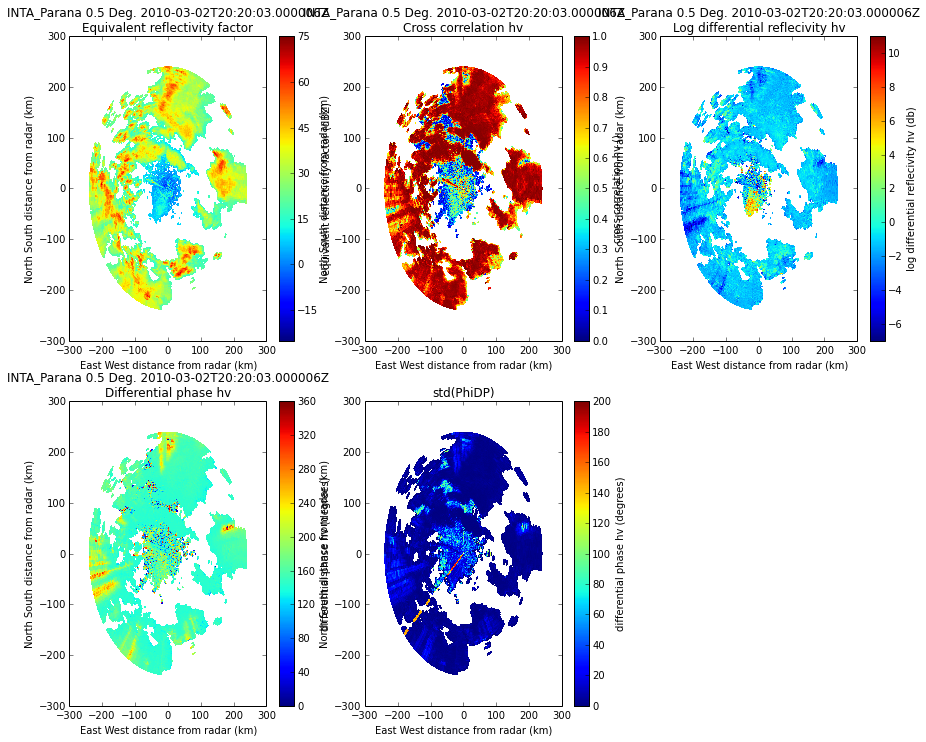

In [108]:
##graficos

display1 = pyart.graph.RadarDisplay(ele1)
display = pyart.graph.RadarDisplay(radar2)
f = plt.figure(figsize = [15,12])

plt.subplot(2, 3, 1) 
display.plot_ppi('dBZ',vmin=-25,vmax=75)
plt.subplot(2, 3, 2) 
display.plot_ppi('RhoHV',vmin=0,vmax=1)
plt.subplot(2, 3, 3) 
display.plot_ppi('ZDR',vmin=-7,vmax=11) 
plt.subplot(2, 3, 4) 
display.plot_ppi('uPhiDP',vmin=0,vmax=360) 
ax6=plt.subplot(2, 3, 5) 
display1.plot_ppi('stdPhiDP',vmin=0,vmax=200)
ax6.set_title(u'std(PhiDP)');

#plt.savefig("/home/sofia/radar_parana/imagenes/20100304_222345_120")
#plt.savefig("/home/sofia/radar_parana/imagenes/20100302_190002_240")

plt.savefig("/home/sofia/radar_parana/imagenes/20100302_202003_240")